# Film Trend Analysis for Hypothetical Microsoft Film Studio

In this notebook I'll be presenting my work and recommendations for the type of movies a hypothetical Microsoft film studio should create, particularly with a focus on maximizing return on investment. This presentation is for phase one of the Flatiron Boot Camp Data Science course project.

To start off we'll be importing various commonly used Python libraries for data science.

### Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import os
import seaborn as sns
import requests
from bs4 import BeautifulSoup
import re
import json

### Read in provided data to a dictionary for convenient access by CSV name

In [2]:
data_imports = {}

# Importing all the provided CSVs and TSVs to a dictionary
for file in os.listdir("zippedData"):
    print(file)
    if file[-3:] == 'csv':
        data_imports[file[:-4]] = pd.read_csv('zippedData/' + str(file))
    elif file[-3:] == 'tsv':
        data_imports[file[:-4]] = pd.read_csv('zippedData/' + str(file), sep = '\t', encoding= 'unicode_escape')
    data_imports[file[:-4]].head()

print("Finished import")

tmdb.movies.csv
title.crew.csv
title.basics.csv
rt.reviews.tsv
tn.movie_budgets.csv
name.basics.csv
title.akas.csv
bom.movie_gross.csv
rt.movie_info.tsv
title.principals.csv
title.ratings.csv
Finished import


At this point we'll take a peek at each of the files to decide which we'll find useful.

In [3]:
print(data_imports['tmdb.movies'].info())
data_imports['tmdb.movies'].head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB
None


,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [4]:
print(data_imports['title.crew'].info())
data_imports['title.crew'].head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   tconst     146144 non-null  object
 1   directors  140417 non-null  object
 2   writers    110261 non-null  object
dtypes: object(3)
memory usage: 3.3+ MB
None


,tconst,directors,writers
0,tt0285252,nm0899854,nm0899854
1,tt0438973,NaN,"nm0175726,nm1802864"
2,tt0462036,nm1940585,nm1940585
3,tt0835418,nm0151540,"nm0310087,nm0841532"
4,tt0878654,"nm0089502,nm2291498,nm2292011",nm0284943


In [5]:
print(data_imports['title.basics'].info())
data_imports['title.basics'].head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB
None


,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [6]:
print(data_imports['rt.reviews'].info())
data_imports['rt.reviews'].head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          54432 non-null  int64 
 1   review      48869 non-null  object
 2   rating      40915 non-null  object
 3   fresh       54432 non-null  object
 4   critic      51710 non-null  object
 5   top_critic  54432 non-null  int64 
 6   publisher   54123 non-null  object
 7   date        54432 non-null  object
dtypes: int64(2), object(6)
memory usage: 3.3+ MB
None


,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


In [7]:
print(data_imports['tn.movie_budgets'].info())
data_imports['tn.movie_budgets'].head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB
None


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [8]:
print(data_imports['name.basics'].info())
data_imports['name.basics'].head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 606648 entries, 0 to 606647
Data columns (total 6 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   nconst              606648 non-null  object 
 1   primary_name        606648 non-null  object 
 2   birth_year          82736 non-null   float64
 3   death_year          6783 non-null    float64
 4   primary_profession  555308 non-null  object 
 5   known_for_titles    576444 non-null  object 
dtypes: float64(2), object(4)
memory usage: 27.8+ MB
None


,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"


In [9]:
print(data_imports['title.akas'].info())
data_imports['title.akas'].head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331703 entries, 0 to 331702
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   title_id           331703 non-null  object 
 1   ordering           331703 non-null  int64  
 2   title              331703 non-null  object 
 3   region             278410 non-null  object 
 4   language           41715 non-null   object 
 5   types              168447 non-null  object 
 6   attributes         14925 non-null   object 
 7   is_original_title  331678 non-null  float64
dtypes: float64(1), int64(1), object(6)
memory usage: 20.2+ MB
None


,title_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0
1,tt0369610,11,Jurashikku warudo,JP,NaN,imdbDisplay,NaN,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,NaN,imdbDisplay,NaN,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,NaN,NaN,short title,0.0
4,tt0369610,14,Jurassic World,FR,NaN,imdbDisplay,NaN,0.0


In [10]:
print(data_imports['bom.movie_gross'].info())
data_imports['bom.movie_gross'].head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB
None


,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [11]:
print(data_imports['rt.movie_info'].info())
data_imports['rt.movie_info'].head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB
None


,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [12]:
print(data_imports['title.principals'].info())
data_imports['title.principals'].head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028186 entries, 0 to 1028185
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   tconst      1028186 non-null  object
 1   ordering    1028186 non-null  int64 
 2   nconst      1028186 non-null  object
 3   category    1028186 non-null  object
 4   job         177684 non-null   object
 5   characters  393360 non-null   object
dtypes: int64(1), object(5)
memory usage: 47.1+ MB
None


,tconst,ordering,nconst,category,job,characters
0,tt0111414,1,nm0246005,actor,NaN,"[""The Man""]"
1,tt0111414,2,nm0398271,director,NaN,NaN
2,tt0111414,3,nm3739909,producer,producer,NaN
3,tt0323808,10,nm0059247,editor,NaN,NaN
4,tt0323808,1,nm3579312,actress,NaN,"[""Beth Boothby""]"


In [13]:
print(data_imports['title.ratings'].info())
data_imports['title.ratings'].head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB
None


,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


My takeaway from the provided information is that there are a few angles from which this problem could be approached. 

1. We could look at the relationship between ratings given to movies on the sites provided (IMDB, TMDB, and Rotten Tomatoes) and profitability. 
    * I'm reluctant to go this route because the possible outcomes would trend towards recommendations to make movies of a certain quality, something that is hard to control because it relies on external validation (audience favorability). Furthermore, I can't imagine a pitch where I suggest they make a bad movie, a la The Producers.
2. We could look for a correlation between genres and profitability.
3. We could find correlations between cast/crew and profitability.
4. We could examine the effects that characteristics like MPAA ratings (G, PG, PG-13, R) and runtime have on profitability.

For the purposes of this project, and largely as a factor of limited time, I'll be focusing on genre with a light exploration of runtime.

To commence this data-dive, my first objective will be combining all of the tables which would give me an insight into how much money each film made compared to its budget.

### Grab bom.movie_gross and set the index as release year and then title

In [53]:
bom_movie_gross = data_imports['bom.movie_gross']

In [15]:
bom_movie_gross = bom_movie_gross.rename(columns = {'year': 'start_year'})
bom_movie_gross = bom_movie_gross.set_index(['start_year', 'title'])
bom_movie_gross.head()

studio  domestic_gross  \
start_year title                                                                
2010       Toy Story 3                                     BV     415000000.0   
           Alice in Wonderland (2010)                      BV     334200000.0   
           Harry Potter and the Deathly Hallows Part 1     WB     296000000.0   
           Inception                                       WB     292600000.0   
           Shrek Forever After                           P/DW     238700000.0   

                                                       foreign_gross  
start_year title                                                      
2010       Toy Story 3                                     652000000  
           Alice in Wonderland (2010)                      691300000  
           Harry Potter and the Deathly Hallows Part 1     664300000  
           Inception                                       535700000  
           Shrek Forever After                             513900000

## Merge title.basics with title.ratings into imdb_df



In [16]:
title_basics = data_imports['title.basics']
title_ratings = data_imports['title.ratings']

title_basics = title_basics.set_index('tconst')
title_ratings = title_ratings.set_index('tconst')
imdb_df = title_basics.join(title_ratings, on='tconst')

## Merge imdb_df with tmdb.movies

In [17]:
tmdb_movies = data_imports['tmdb.movies']
tmdb_movies = tmdb_movies.drop_duplicates(subset = ['id'])
tmdb_movies['start_year'] = tmdb_movies['release_date'].apply(lambda x: int(x[:4]))
tmdb_movies = tmdb_movies.set_index(['start_year', 'title'])
tmdb_movies.head()

<ipython-input-17-f14b20124c6e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmdb_movies['start_year'] = tmdb_movies['release_date'].apply(lambda x: int(x[:4]))


Unnamed: 0  \
start_year title                                                      
2010       Harry Potter and the Deathly Hallows: Part 1           0   
           How to Train Your Dragon                               1   
           Iron Man 2                                             2   
1995       Toy Story                                              3   
2010       Inception                                              4   

                                                                   genre_ids  \
start_year title                                                               
2010       Harry Potter and the Deathly Hallows: Part 1      [12, 14, 10751]   
           How to Train Your Dragon                      [14, 12, 16, 10751]   
           Iron Man 2                                          [12, 28, 878]   
1995       Toy Story                                         [16, 35, 10751]   
2010       Inception                                           [28, 878, 12]   

                                                            id  \
start_year title                                                 
2010       Harry Potter and the Deathly Hallows: Part 1  12444   
           How to Train Your Dragon                      10191   
           Iron Man 2                                    10138   
1995       Toy Story                                       862   
2010       Inception                                     27205   

                                                        original_language  \
start_year title                                                            
2010       Harry Potter and the Deathly Hallows: Part 1                en   
           How to Train Your Dragon                                    en   
           Iron Man 2                                                  en   
1995       Toy Story                                                   en   
2010       Inception                                                   en   

                                                                                       original_title  \
start_year title                                                                                        
2010       Harry Potter and the Deathly Hallows: Part 1  Harry Potter and the Deathly Hallows: Part 1   
           How to Train Your Dragon                                          How to Train Your Dragon   
           Iron Man 2                                                                      Iron Man 2   
1995       Toy Story                                                                        Toy Story   
2010       Inception                                                                        Inception   

                                                         popularity  \
start_year title                                                      
2010       Harry Potter and the Deathly Hallows: Part 1      33.533   
           How to Train Your Dragon                          28.734   
           Iron Man 2                                        28.515   
1995       Toy Story                                         28.005   
2010       Inception                                         27.920   

                                                        release_date  \
start_year title                                                       
2010       Harry Potter and the Deathly Hallows: Part 1   2010-11-19   
           How to Train Your Dragon                       2010-03-26   
           Iron Man 2                                     2010-05-07   
1995       Toy Story                                      1995-11-22   
2010       Inception                                      2010-07-16   

                                                         vote_average  \
start_year title                                                        
2010       Harry Potter and the Deathly Hallows: Part 1           7.7   
           How to Train Your Dragon  

In [18]:
imdb_df = imdb_df.rename(columns = {'primary_title': "title"})
imdb_df = imdb_df.reset_index()
working_df = imdb_df.set_index(['start_year', 'title']).join(tmdb_movies, how='outer', lsuffix='_imdb', rsuffix='_mvdb')


working_df = working_df.drop(columns=['Unnamed: 0', 'vote_average', 'vote_count', 'popularity', 'genre_ids', 'id'])


working_df.head()

,,tconst,original_title_imdb,runtime_minutes,genres,averagerating,numvotes,original_language,original_title_mvdb,release_date
start_year,title,,,,,,,,,
1930,All Quiet on the Western Front,NaN,NaN,NaN,NaN,NaN,NaN,en,All Quiet on the Western Front,1930-04-29
1933,The Vampire Bat,NaN,NaN,NaN,NaN,NaN,NaN,en,The Vampire Bat,1933-01-21
1936,Le Bonheur,NaN,NaN,NaN,NaN,NaN,NaN,fr,Le Bonheur,1936-02-27
1939,How Walt Disney Cartoons Are Made,NaN,NaN,NaN,NaN,NaN,NaN,en,How Walt Disney Cartoons Are Made,1939-01-19
1946,The Best Years of Our Lives,NaN,NaN,NaN,NaN,NaN,NaN,en,The Best Years of Our Lives,1946-12-25


## Add in bom_movie_gross

In [19]:
working_df = working_df.join(bom_movie_gross, how='outer')

## Add in tn_movie_budgets

In [20]:
tn_movie_budgets = data_imports['tn.movie_budgets']

In [21]:
working_df['release_date'] = pd.to_datetime(working_df['release_date'])
tn_movie_budgets['start_year'] = pd.DatetimeIndex(tn_movie_budgets['release_date']).year
tn_movie_budgets = tn_movie_budgets.rename(columns={'movie':'title'})
tn_movie_budgets = tn_movie_budgets.set_index(['start_year', 'title'])

In [22]:
working_df = working_df.join(tn_movie_budgets, how='outer', lsuffix='_imdb', rsuffix='_tn')

We've narrowed our scope to films made in the 21st century because we are more concerned with making money on movies yet to be made, rather than analyzing the history of film production.

In [23]:
working_df = working_df.reset_index()
working_df = working_df[working_df['start_year'] > 2000]
working_df = working_df.set_index(['start_year', 'title'])

## Drop NaN genres as they'll be largely useless in a genre analysis

In [24]:
working_df = working_df.dropna(subset=['genres'])
working_df = working_df[working_df['original_language'] == 'en']
working_df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 11122 entries, (2010, '* Cemetery') to (2018, 'eHero')
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   tconst               11122 non-null  object        
 1   original_title_imdb  11122 non-null  object        
 2   runtime_minutes      10864 non-null  float64       
 3   genres               11122 non-null  object        
 4   averagerating        10761 non-null  float64       
 5   numvotes             10761 non-null  float64       
 6   original_language    11122 non-null  object        
 7   original_title_mvdb  11122 non-null  object        
 8   release_date_imdb    11122 non-null  datetime64[ns]
 9   studio               1430 non-null   object        
 10  domestic_gross_imdb  1424 non-null   float64       
 11  foreign_gross        1127 non-null   object        
 12  id                   1398 non-null   float64       
 13  re

In the above info on the working_df, we have 11,122 entries; however, only 1398 (maximum) have matchable gross incomes and budgets. That number at this point is likely even lower if any of the movies in production_budget don't have an income match. As an academic exercise as well as with an interest in maximizing the number of usable rows, I made a web scraper for Wikipedia. The below code searches Wikipedia for a given movie and returns its budget as an integer.

# Scraping Wikipedia for production budgets

I now had to decide whether it was better to remove foreign films from the dataset or spend the time required to write code to account for each individual foreign currency found through scraping. Looking at various factors (the scope of the project, Microsoft being an American company, and the marginal number of foreign films remaining in my dataset), I decided that it was better to simply return None for budgets not in US dollars.

In [59]:
def convert_budget_to_int(budget, debug):

    '''Takes in the string, isolated, as budget, and return a number of type int or 
    None if it fails certain conditions, including being a non-US Dollar currency'''
    
    #     Checks for various non-alphanumeric characters

    if type(budget) == int:
        return budget
    if type(budget) == float:
        return int(budget)
    if budget.startswith('$CAD'):
        return None
    if budget.startswith('$') or budget.startswith('US$'):
        if budget[0] == '<':
            budget = budget[1:]
        while '[' in budget:
            budget = budget.replace(
                budget[budget.index('['):budget.index(']')+1], '')
        if '–' in budget:
            currency = ''
            for i in budget:
                if not i.isnumeric():
                    currency = currency + i
                else:
                    break
            if debug:
                print(budget, "Middle of dash check")
            budget = budget[budget.index('–')+1:]
            budget = currency + budget
        if '-' in budget:
            currency = ''
            for i in budget:
                if not i.isnumeric():
                    currency = currency + i
                else:
                    break
            if debug:
                print(budget, "Middle of dash check")
            budget = budget[budget.index('-')+1:]
            budget = currency + budget
        if '—' in budget:
            currency = ''
            for i in budget:
                if not i.isnumeric():
                    currency = currency + i
                else:
                    break
            if debug:
                print(budget, "Middle of dash check")
            budget = budget[budget.index('—')+1:]
            budget = currency + budget
        if debug:
            print(budget)

#     Using regex because for some reason ' ' would not be recognized for certain movies
        if bool(re.search(r"\s", budget)):
            whitespace_index = re.search(r"\s", budget).start()
            if budget[whitespace_index-1].isnumeric():
                number = budget[:whitespace_index]
                word = budget[whitespace_index+1:]
            else:
                whitespace_index = re.search(
                    r"\s", budget[:whitespace_index]+budget[whitespace_index+1:]).start()
                number = budget[:whitespace_index+1]
                word = budget[whitespace_index+2:]
            if debug:
                print(word)
                print(number)

        else:
            number, word = budget, ''
        if debug:
            print(number, 'Before \'.\' check')
        if '.' in number:
            left, right = number.split('.')
            decimal_places = len(right)
            number = number.replace('.', '')

#     Replacing instances of million and crore (Indian for ten million) with the proper number of zeroes

        if 'crore' in word.lower():
            try:
                number = number + '0000000'[decimal_places:]
            except:
                number = number + '0000000'
        elif 'million' in word.lower():
            try:
                number = number + '000000'[decimal_places:]
            except:
                number = number + '000000'

        if ',' in number:
            number = number.replace(',', '')

        budget = budget.strip()
        if debug:
            print(budget)

        if budget[0] == '$':
            number = number.replace('$', '')
        elif budget[:3] == 'US$':
            number = number.replace('US$', '')

        return int(number)

# Replaces spaces in a URL with %20

def urlify(in_string):
    '''Replaces spaces in a URL with %20 for api search'''
    
    return "%20".join(in_string.split())





def wiki_search(search):
    
    '''Uses Wikipedia's API to search for movies. 
    In practice I search by the title and year to reduce the chance of an incorrect match'''
    
    url = "https://en.wikipedia.org/w/api.php?action=query&format=json&prop=&list=search&srsearch={}".format(
        urlify(search))
    response = requests.get(url=url)

    try:
        return(response.json()['query']['search'][0]['pageid'])
    except IndexError:
        return None





def wiki_grab(search, debug=False):
    
    '''The called function which managed the search for movies on Wikipedia, 
    the isolating of the budget string, and ultimately the return of the budget as an integer'''
    
    searches_to_ignore = ['#Stuck 2014',
                          'House of Black Wings 2010',
                          'Restoring a Masterpiece: The Renovation of Eastman Theatre 2010',
                          'Avatar: Special Edition 2010',
                          'The Forgotten Jewel 2010',
                          'Birth of a Party 2011'
                          ]
    if search[0] == '#':
        return None
    if search in searches_to_ignore:
        return None
    pageid = wiki_search(search)
    if debug:
        print(pageid)
    if pageid is None:
        return None
    url = 'https://en.wikipedia.org/w/api.php?action=parse&format=json&pageid={}&prop=text&formatversion=2'.format(
        pageid)
    if debug:
        print(url)
    response = requests.get(url=url)
    soup = BeautifulSoup(response.json()['parse']['text'])

    if 'Budget</th>' in str(soup):
        if soup.find(text='Budget').next.text:
            return convert_budget_to_int(soup.find(text='Budget').next.text, debug)
        elif '(gross)' in soup.find(text='Budget').next.text:
            gross = soup.find('li', text=re.compile(r' .+(\(gross\))')).text
            gross = gross.replace(' (gross)', '')
            gross = convert_budget_to_int(gross, debug)
            return(gross)
        elif re.compile(r' \d') in soup.find(text='Budget').next.li.text:
            return(soup.find('li', text=re.compile(r' \d')))

# A test run
# print(wiki_grab("Habermann 2010", True))

In [ ]:
# This calls the above functions. First, we create the column for the scrapped data, 'budget_wiki'. 
# Then we run through the NaN values in the column for movies to search for. This allows us to run
# the same code multiple times without searching for the same movie twice in case the code runs into
# an error

working_df['budget_wiki'] = np.nan
for year, title in working_df[working_df['budget_wiki'].isna()].index.values.tolist():
    try:
#         Do not search again in the senario that we're running this code multiple times due to error
        if working_df.loc[(year, title), 'budget_wiki'].values[0] == -1:
            continue
        print(title, year)
        budget = wiki_grab(title + ' ' + str(year))
        if budget == None:
            working_df.loc[(year, title), 'budget_wiki'] = -1
        else:
            working_df.loc[(year, title), 'budget_wiki'] = budget
        print(working_df.loc[(year, title), 'budget_wiki'])
    except:
        working_df.loc[(year, title), 'budget_wiki'] = -1

## Save work to avoid having to run the scraper more than necessary

In [26]:
working_df.to_csv('post_wiki_scrape.csv', mode='w')

tconst original_title_imdb  runtime_minutes  \
start_year title                                                              
2010       * Cemetery        tt1598691          * Cemetery             80.0   
           127 Hours         tt1542344           127 Hours             94.0   
           12th & Delaware   tt1548865     12th & Delaware             81.0   
           13                tt0798817                  13             91.0   
           15 Till Midnight  tt1568798    15 Till Midnight             97.0   

                                                genres  averagerating  \
start_year title                                                        
2010       * Cemetery           Comedy,Horror,Thriller            5.2   
           127 Hours         Adventure,Biography,Drama            7.6   
           12th & Delaware           Documentary,Drama            7.5   
           13                           Drama,Thriller            6.1   
           15 Till Midnight       Drama,Mystery,Sci-Fi            2.8   

                             numvotes original_language original_title_mvdb  \
start_year title                                                              
2010       * Cemetery            17.0                en          * Cemetery   
           127 Hours         323949.0                en           127 Hours   
           12th & Delaware      407.0                en     12th & Delaware   
           13                 38418.0                en                  13   
           15 Till Midnight     244.0                en    15 Till Midnight   

                            release_date_imdb studio  domestic_gross_imdb  \
start_year title                                                            
2010       * Cemetery              2010-01-01    NaN                  NaN   
           127 Hours               2010-11-05   FoxS           18300000.0   
           12th & Delaware         2010-04-01    NaN                  NaN   
           13                      2010-03-12    NaN                  NaN   
           15 Till Midnight        2010-01-01    NaN                  NaN   

                            foreign_gross   id release_date_tn  \
start_year title                                                 
2010       * Cemetery                 NaN  NaN             NaN   
           127 Hours             42400000  6.0     Nov 5, 2010   
           12th & Delaware            NaN  NaN             NaN   
           13                         NaN  NaN             NaN   
           15 Till Midnight           NaN  NaN             NaN   

                            production_budget domestic_gross_tn  \
start_year title                                                  
2010       * Cemetery                     NaN               NaN   
           127 Hours              $18,000,000       $18,335,230   
           12th & Delaware                NaN               NaN   
           13                             NaN               NaN   
           15 Till Midnight               NaN               NaN   

                            worldwide_gross budget_wiki  
start_year title                                         
2010       * Cemetery                   NaN     Unknown  
           127 Hours            $60,217,171    18000000  
           12th & Delaware              NaN     Unknown  
           13                           NaN     Unknown  
           15 Till Midnight             NaN     Unknown

As the above scraping takes hours to run, I've taken the liberty of saving all the scraped data to a CSV file included in this repo called 'post_wiki_scrape.csv.' The following code can be run to import it and pick up right where the above scraping would have left us off.

In [27]:
working_df = pd.read_csv('post_wiki_scrape.csv')
working_df = working_df.set_index(['start_year', 'title'])
working_df.head()

tconst original_title_imdb  runtime_minutes  \
start_year title                                                              
2010       * Cemetery        tt1598691          * Cemetery             80.0   
           127 Hours         tt1542344           127 Hours             94.0   
           12th & Delaware   tt1548865     12th & Delaware             81.0   
           13                tt0798817                  13             91.0   
           15 Till Midnight  tt1568798    15 Till Midnight             97.0   

                                                genres  averagerating  \
start_year title                                                        
2010       * Cemetery           Comedy,Horror,Thriller            5.2   
           127 Hours         Adventure,Biography,Drama            7.6   
           12th & Delaware           Documentary,Drama            7.5   
           13                           Drama,Thriller            6.1   
           15 Till Midnight       Drama,Mystery,Sci-Fi            2.8   

                             numvotes original_language original_title_mvdb  \
start_year title                                                              
2010       * Cemetery            17.0                en          * Cemetery   
           127 Hours         323949.0                en           127 Hours   
           12th & Delaware      407.0                en     12th & Delaware   
           13                 38418.0                en                  13   
           15 Till Midnight     244.0                en    15 Till Midnight   

                            release_date_imdb studio  domestic_gross_imdb  \
start_year title                                                            
2010       * Cemetery              2010-01-01    NaN                  NaN   
           127 Hours               2010-11-05   FoxS           18300000.0   
           12th & Delaware         2010-04-01    NaN                  NaN   
           13                      2010-03-12    NaN                  NaN   
           15 Till Midnight        2010-01-01    NaN                  NaN   

                            foreign_gross   id release_date_tn  \
start_year title                                                 
2010       * Cemetery                 NaN  NaN             NaN   
           127 Hours             42400000  6.0     Nov 5, 2010   
           12th & Delaware            NaN  NaN             NaN   
           13                         NaN  NaN             NaN   
           15 Till Midnight           NaN  NaN             NaN   

                            production_budget domestic_gross_tn  \
start_year title                                                  
2010       * Cemetery                     NaN               NaN   
           127 Hours              $18,000,000       $18,335,230   
           12th & Delaware                NaN               NaN   
           13                             NaN               NaN   
           15 Till Midnight               NaN               NaN   

                            worldwide_gross budget_wiki  
start_year title                                         
2010       * Cemetery                   NaN     Unknown  
           127 Hours            $60,217,171    18000000  
           12th & Delaware              NaN     Unknown  
           13                           NaN     Unknown  
           15 Till Midnight             NaN     Unknown

In [30]:
# Convert financial columns to int64 for comparison

def convert_columns_to_int(budget):
    try:
        return int(float(budget))
    except:
        return convert_budget_to_int(budget, False)

for column in ['domestic_gross_imdb',
               'foreign_gross',
               'production_budget',
               'domestic_gross_tn',
               'worldwide_gross',
               'budget_wiki'
              ]:
    working_df[column] = working_df[column].fillna(-1)
    working_df[column] = working_df[column].apply(lambda x: convert_columns_to_int(x))
    working_df[column] = working_df[column].astype('int64')

working_df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 11122 entries, (2010, '* Cemetery') to (2018, 'eHero')
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   tconst               11122 non-null  object 
 1   original_title_imdb  11122 non-null  object 
 2   runtime_minutes      10864 non-null  float64
 3   genres               11122 non-null  object 
 4   averagerating        10761 non-null  float64
 5   numvotes             10761 non-null  float64
 6   original_language    11122 non-null  object 
 7   original_title_mvdb  11122 non-null  object 
 8   release_date_imdb    11122 non-null  object 
 9   studio               1430 non-null   object 
 10  domestic_gross_imdb  11122 non-null  int64  
 11  foreign_gross        11122 non-null  int64  
 12  id                   1398 non-null   float64
 13  release_date_tn      1398 non-null   object 
 14  production_budget    11122 non-null  int64  
 15  domesti

At this point with all the data gathered we're going to narrow it down to a working worldwide gross income and a working budget. This process involves some judgment calls in the cases where we have more than one column with similar data. Based on cursory checks of the data combined with some recreational research, I decided to give preference to data from IMDB and Wikipedia, as they had the most robust and accurate data.

In [54]:
# Derive a working worldwide gross and working budget based on the data gathered with a
# preference for information from IMDB and Wikipedia based on examinations of the datasets

working_df['working_wwg'] = working_df.apply(
    lambda x: x['domestic_gross_imdb'] + x['foreign_gross'] if x['domestic_gross_imdb'] > -1 and x['foreign_gross'] > -1 
        else x['worldwide_gross'], axis = 1)
working_df['working_budget'] = working_df.apply(
    lambda x: x['budget_wiki'] if x['budget_wiki'] > -1 else x['production_budget'], axis = 1)

In [32]:
working_df['roi'] = working_df.apply(lambda x: x['working_wwg'] - x['working_budget'], axis = 1)
working_df = working_df.drop_duplicates()

# Split *genres* column into *genre1*, *genre2*, *genre3*


In order to prepare the data for analysis, I needed to split the _genres_ column. As provided the column is a string with comma separated values. The below code verifies that no row has more than two commas in the _genres_ column (i.e. no more than three genres). The code after that creates three new columns for the three potential genres.

In [33]:
# Find the maximum number of commas in the genres column
comma_counter = 0

for each in working_df['genres']:
    if type(each) == str:
        current_count = each.count(',')
        if current_count > comma_counter:
            comma_counter = current_count
    
comma_counter

2

In [34]:
working_df[['genre1', 'genre2', 'genre3']] = working_df['genres'].str.split(',', expand=True)

## Replacing NaN with "Unknown"

In [35]:
working_df = working_df.fillna(value = {
    'genres': 'Unknown', 'genre1': 'Unknown', 'genre3': 'Unknown', 'genre2': 'Unknown'
})

analysis_df = working_df[[
    'runtime_minutes',
    'genres',
    'genre1',
    'genre2',
    'genre3',
    'working_wwg',
    'working_budget',
    'roi'
]].copy()
analysis_df.head()

runtime_minutes                     genres  \
start_year title                                                          
2010       * Cemetery                   80.0     Comedy,Horror,Thriller   
           127 Hours                    94.0  Adventure,Biography,Drama   
           12th & Delaware              81.0          Documentary,Drama   
           13                           91.0             Drama,Thriller   
           15 Till Midnight             97.0       Drama,Mystery,Sci-Fi   

                                  genre1     genre2    genre3  working_wwg  \
start_year title                                                             
2010       * Cemetery             Comedy     Horror  Thriller           -1   
           127 Hours           Adventure  Biography     Drama     60700000   
           12th & Delaware   Documentary      Drama   Unknown           -1   
           13                      Drama   Thriller   Unknown           -1   
           15 Till Midnight        Drama    Mystery    Sci-Fi           -1   

                             working_budget       roi  
start_year title                                       
2010       * Cemetery                    -1         0  
           127 Hours               18000000  42700000  
           12th & Delaware               -1         0  
           13                            -1         0  
           15 Till Midnight              -1         0

In [36]:
# Drops rows where we collected either no worldwide gross or budget

analysis_df = analysis_df[analysis_df['roi'] != 0]
analysis_df = analysis_df[analysis_df['working_wwg'] != -1]
analysis_df = analysis_df[analysis_df['working_budget'] != -1]
analysis_df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 1512 entries, (2010, '127 Hours') to (2018, 'Winchester')
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   runtime_minutes  1502 non-null   float64
 1   genres           1512 non-null   object 
 2   genre1           1512 non-null   object 
 3   genre2           1512 non-null   object 
 4   genre3           1512 non-null   object 
 5   working_wwg      1512 non-null   int64  
 6   working_budget   1512 non-null   int64  
 7   roi              1512 non-null   int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 501.2+ KB


In [37]:
# Resets the index to the default integers for graphing and data manipulation

analysis_df = analysis_df.reset_index()
analysis_df= analysis_df.rename(columns = {'start_year': 'year'})

# Analysis

## Break up the dataframe along certain budget markers and create series through which we can analyze the performance of different genres

Note that this method double and triple counts certain movies with more than one listed genre, which is why it's important for us to eliminate genres with too few examples to prevent skewing.

In [38]:
genre_roi = pd.concat([pd.Series(analysis_df['roi'].values, analysis_df['genre1']),
                       pd.Series(analysis_df['roi'].values, analysis_df['genre2']),
                       pd.Series(analysis_df['roi'].values, analysis_df['genre3'])])

analysis_df_1mil = analysis_df[analysis_df['working_budget'] >= 1000000].copy()

genre_roi1 = pd.concat([pd.Series(analysis_df_1mil['roi'].values, analysis_df_1mil['genre1']),
                       pd.Series(analysis_df_1mil['roi'].values, analysis_df_1mil['genre2']),
                       pd.Series(analysis_df_1mil['roi'].values, analysis_df_1mil['genre3'])])

analysis_df_10mil = analysis_df[analysis_df['working_budget'] >= 10000000].copy()

genre_roi10 = pd.concat([pd.Series(analysis_df_10mil['roi'].values, analysis_df_10mil['genre1']),
                       pd.Series(analysis_df_10mil['roi'].values, analysis_df_10mil['genre2']),
                       pd.Series(analysis_df_10mil['roi'].values, analysis_df_10mil['genre3'])])

## Check how many of each genre is present to prevent skewing

In [39]:
pd.DataFrame(genre_roi).reset_index()['index'].value_counts()

Drama          735
Unknown        686
Comedy         519
Action         443
Adventure      358
Thriller       270
Crime          237
Romance        196
Horror         180
Biography      140
Mystery        128
Sci-Fi         128
Fantasy        125
Animation      104
Family          92
Music           47
Documentary     44
History         40
Sport           29
War             15
Western         11
Musical          8
Reality-TV       1
Name: index, dtype: int64

In [40]:
pd.DataFrame(genre_roi1).reset_index()['index'].value_counts()

Drama          699
Unknown        627
Comedy         503
Action         437
Adventure      358
Thriller       255
Crime          233
Romance        185
Horror         167
Biography      137
Fantasy        122
Sci-Fi         121
Mystery        117
Animation      104
Family          90
Music           46
History         40
Documentary     36
Sport           29
War             15
Western         11
Musical          8
Reality-TV       1
Name: index, dtype: int64

In [41]:
pd.DataFrame(genre_roi10).reset_index()['index'].value_counts()

Drama          529
Comedy         406
Unknown        405
Action         396
Adventure      336
Crime          195
Thriller       186
Romance        141
Fantasy        111
Biography      111
Sci-Fi         106
Animation       99
Horror          95
Mystery         79
Family          77
History         35
Music           34
Sport           24
Documentary     15
War             13
Western          8
Musical          7
Name: index, dtype: int64

In [42]:
genre_roi = genre_roi.drop(labels=['Reality-TV', 'Musical'])
genre_roi1 = genre_roi1.drop(labels=['Reality-TV', 'Musical'])
genre_roi10 = genre_roi10.drop(labels=['Western', 'Musical'])

Before we graph these sets, we're going to reset the index and properly name the *roi* column.

In [43]:
genre_roi_df = pd.DataFrame(genre_roi).reset_index().rename(columns={0:'roi'})
genre_roi1_df = pd.DataFrame(genre_roi1).reset_index().rename(columns={0:'roi'})
genre_roi10_df = pd.DataFrame(genre_roi10).reset_index().rename(columns={0:'roi'})

## General genre return on investment breakdown (no budget floor, excluded genres with fewer than 10 films in dataset), ordered by mean


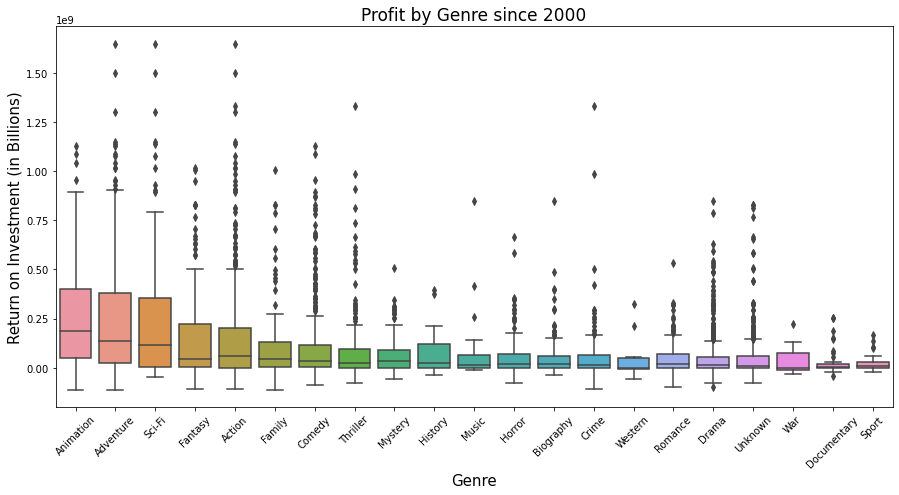

In [44]:
my_order = genre_roi_df.groupby("index")["roi"].mean().sort_values().iloc[::-1].index


plt.figure(figsize=(15, 7))

ax = sns.boxplot(x=genre_roi_df['index'], y=genre_roi_df['roi'], data=(genre_roi_df), order=my_order)
plt.setp(ax.get_xticklabels(), rotation=45, fontsize=10)
plt.setp(ax.get_yticklabels(), fontsize = 10)

ax.set_title('Profit by Genre since 2000', fontsize = 17)
ax.set_xlabel('Genre', fontsize=15);
ax.set_ylabel('Return on Investment (in Billions)', fontsize=15);

Among all movies in the dataset, there is a clear preference in the market for Animation, Adventure, and Sci-Fi.

## General genre return on investment breakdown (budget >$1 million,  excluded genres with fewer than 10 films in dataset), ordered by mean


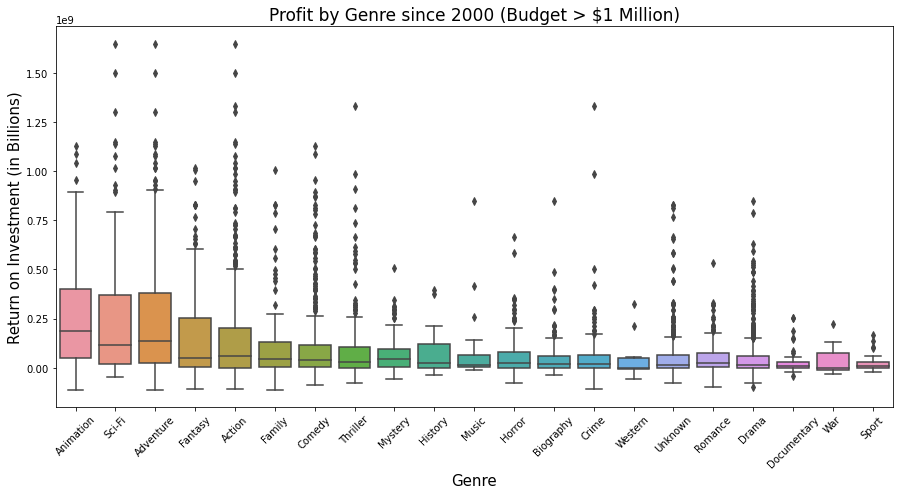

In [45]:
my_order = genre_roi1_df.groupby("index")["roi"].mean().sort_values().iloc[::-1].index


plt.figure(figsize=(15, 7))

ax = sns.boxplot(x=genre_roi1_df['index'], y=genre_roi1_df['roi'], data=(genre_roi1_df), order=my_order)
plt.setp(ax.get_xticklabels(), rotation=45, fontsize=10)
plt.setp(ax.get_yticklabels(), fontsize = 10)

ax.set_title('Profit by Genre since 2000 (Budget > $1 Million)', fontsize = 17)
ax.set_xlabel('Genre', fontsize=15);
ax.set_ylabel('Return on Investment (in Billions)', fontsize=15);

The aforementioned trend holds when we limit the data to movies with a budget greater than one million US dollars. The one notable change in the data is that Sci-Fi films surpass Adventure when comparing their mean returns on investment.

## General genre return on investment breakdown (budget >$10 million,  excluded genres with fewer than 10 films in dataset), ordered by mean


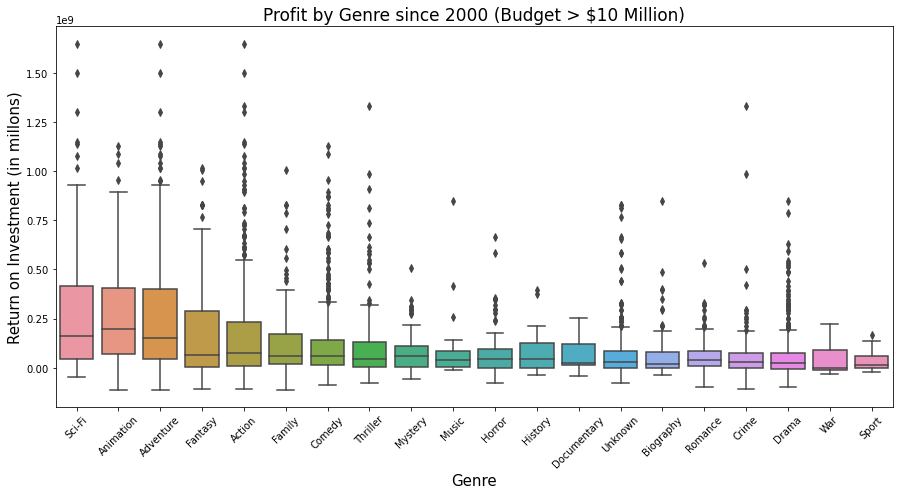

In [46]:
my_order = genre_roi10_df.groupby("index")["roi"].mean().sort_values().iloc[::-1].index


plt.figure(figsize=(15, 7))

ax = sns.boxplot(x=genre_roi10_df['index'], y=genre_roi10_df['roi'], data=(genre_roi10_df), order=my_order)
plt.setp(ax.get_xticklabels(), rotation=45, fontsize=10)
plt.setp(ax.get_yticklabels(), fontsize = 10)

ax.set_title('Profit by Genre since 2000 (Budget > $10 Million)', fontsize = 17)
ax.set_xlabel('Genre', fontsize=15);
ax.set_ylabel('Return on Investment (in millons)', fontsize=15);

Here we see a smiliar trend in movies above a $10 million budget, with Sci-Fi again jumping a spot in the rankings and having the highest mean. The below line graph shows the trend for Sci-Fi films is generally upward, with a slight dip in 2017.

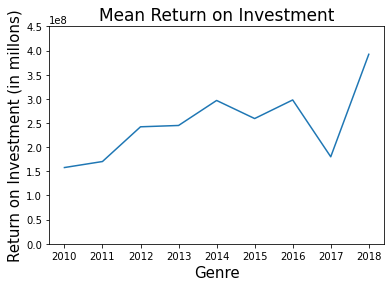

In [47]:
genre_roi2_scifi = pd.DataFrame(pd.concat([pd.Series(analysis_df_1mil.loc[analysis_df_1mil['genre1'] == 'Sci-Fi']['year'].values, analysis_df_1mil.loc[analysis_df_1mil['genre1'] == 'Sci-Fi']['roi']),
                               pd.Series(analysis_df_1mil.loc[analysis_df_1mil['genre2'] == 'Sci-Fi']['year'].values, analysis_df_1mil.loc[analysis_df_1mil['genre2'] == 'Sci-Fi']['roi']),
                               pd.Series(analysis_df_1mil.loc[analysis_df_1mil['genre3'] == 'Sci-Fi']['year'].values, analysis_df_1mil.loc[analysis_df_1mil['genre3'] == 'Sci-Fi']['roi'])]
                              )).reset_index().rename(columns={0:'year'})

grouped_mean = genre_roi2_scifi.groupby('year').mean()

ax = sns.lineplot(x= grouped_mean.index, y=grouped_mean.roi, data=grouped_mean)
plt.ylim(0, 450000000)
ax.set_title('Mean Return on Investment', fontsize = 17)
ax.set_xlabel('Genre', fontsize=15);
ax.set_ylabel('Return on Investment (in millons)', fontsize=15);

A note about the data: it appears based on this graph and a check of the starting data that categorization methodology seems to have changed around 2010 as there are no movies in the data marked as Sci-Fi before that year.

## Group by *runtime_minutes*


At this point I wanted to take a look at whether any conclusions could be drawn on the relationship between movie length and profit. The below graph shows simply that longer movies (defined as movies above 118 minutes, the 75th percentile in the dataset), make the most money. Conversely shorter movies (below 95 minutes, the 25th percentile) make the least. 

In [49]:
analysis_df_runtime_grouped = analysis_df_1mil.copy()

In [50]:
analysis_df_runtime_grouped['runtime_desc'] = analysis_df_runtime_grouped.apply(
    lambda x: 'short' if x['runtime_minutes'] <= 95.0 else(
        'medium' if x['runtime_minutes'] <= 118.0 else 'long'), axis = 1
)

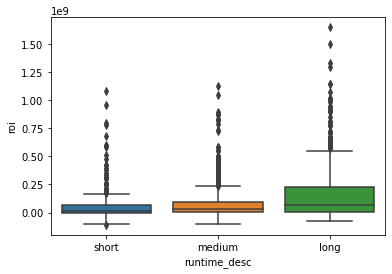

In [51]:
ax = sns.boxplot(x=analysis_df_runtime_grouped['runtime_desc'],
                 y=analysis_df_runtime_grouped['roi'],
                 data=analysis_df_runtime_grouped)


At this point, I realized that the data provided doesn't tell the whole story. Having derived both the genres that earn the most and that movie length positively correlates with profit, I did some additional research on the film industry. While the costs of making animated films may not doom their profitability, the data doesn't account for startup costs associated with creating a brand new animation studio. The acquisition of such specialized talent and the additional technology required can lead to costs as high as $200,000 per minute recorded for a studio's first film. (https://www.studiopigeon.com/blog/how-much-does-it-cost-to-produce-animation-and-why/)

Another obstacle Microsoft may run into with the recommendations implied in the data is the issue of licensing intellectual property. While Sci-Fi and Adventure movies are favored in the data, a look at what those films actually are shows that the vast majority of them belong to tightly controlled franchises based on pre-existing works, primarily Marvel (owned by Disney), Jurassic Park (NBCUniversal), and Transformers (Viacom).

The one exception is original films made by Christopher Nolan. The data shows that among movies classified as both Adventure and Sci-Fi, Christopher Nolan seems to be the secret to cracking the top 20 movies by return on investment without using a pre-existing property. If you look at the below data, all non-franchised movies in this category are directed by Nolan.

In [58]:
analysis_df_1mil.loc[((analysis_df_1mil['genre3'] == 'Sci-Fi') |
                  (analysis_df_1mil['genre2'] == 'Sci-Fi') |
                  (analysis_df_1mil['genre1'] == 'Sci-Fi') )&(
                    (analysis_df_1mil['genre3'] == 'Adventure') |
                    (analysis_df_1mil['genre2'] == 'Adventure') |
                    (analysis_df_1mil['genre1'] == 'Adventure'))
                 ].sort_values(by = 'roi', ascending=False).reset_index().head(20).style.apply(
                lambda x: ['background: #00a4ef' if x.title == 'Inception' or x.title == 'Interstellar' else '' for i in x], axis = 1)

,index,year,title,runtime_minutes,genres,genre1,genre2,genre3,working_wwg,working_budget,roi
0,1392,2018,Avengers: Infinity War,149.000000,"Action,Adventure,Sci-Fi",Action,Adventure,Sci-Fi,2048134200,400000000,1648134200
1,949,2015,Jurassic World,124.000000,"Action,Adventure,Sci-Fi",Action,Adventure,Sci-Fi,1648854864,150000000,1498854864
2,474,2012,The Avengers,143.000000,"Action,Adventure,Sci-Fi",Action,Adventure,Sci-Fi,1517935897,220000000,1297935897
3,1397,2018,Black Panther,134.000000,"Action,Adventure,Sci-Fi",Action,Adventure,Sci-Fi,1347000000,200000000,1147000000
4,1439,2018,Jurassic World: Fallen Kingdom,128.000000,"Action,Adventure,Sci-Fi",Action,Adventure,Sci-Fi,1309500000,170000000,1139500000
5,890,2015,Avengers: Age of Ultron,141.000000,"Action,Adventure,Sci-Fi",Action,Adventure,Sci-Fi,1405400000,330600000,1074800000
6,581,2013,Iron Man 3,130.000000,"Action,Adventure,Sci-Fi",Action,Adventure,Sci-Fi,1214800000,200000000,1014800000
7,344,2011,Transformers: Dark of the Moon,154.000000,"Action,Adventure,Sci-Fi",Action,Adventure,Sci-Fi,1123800000,195000000,928800000
8,1086,2016,Captain America: Civil War,147.000000,"Action,Adventure,Sci-Fi",Action,Adventure,Sci-Fi,1153300000,250000000,903300000
9,865,2014,Transformers: Age of Extinction,165.000000,"Action,Adventure,Sci-Fi",Action,Adventure,Sci-Fi,1104000000,210000000,894000000


After **Interstellar** and **Inception**, the two Nolan films on this list, the next most profitable movie not based on a pre-existing property is the underwhelming **Paul**. It's for this reason that I'd recommend to the hypothetical Microsoft film studio that they make longer than average Adventure/Sci-Fi films in conjunction with Christopher Nolan.